<a href="https://colab.research.google.com/github/yasmin26n/Komputasi-Intelegensia/blob/main/Midterm_KI_Yasmin_Nashwa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**UJIAN TENGAH SEMESTER**
#**KOMPUTASI INTELEGENSIA**

Nama: Yasmin Nashwa Alifya

NPM : 2106725040

Sumber video : https://www.pexels.com/video/westminster-bridge-traffic-5372892/

### 1. In Google Colab, install the libraries necessary for real-time object detection using YOLO and video processing using OpenCV. Explain the roles of each library

In [ ]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117
!pip install ultralytics  # Download YOLOv5 library dari Ultralytics
!pip install opencv-python  # Untuk menangani video

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.6/877.6 kB 28.4 MB/s eta 0:00:00


In [ ]:
# Import libraries
import cv2
from ultralytics import YOLO
from collections import deque

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### 2. Since Google Colab doesn't support direct webcam input, upload a video file and load the pre-trained YOLOv5 model for object detection


In [ ]:
#Download data dari Google Drive
!gdown 1jBQjwCtYA2gviic--z0xtYtRtCvkyqcC

Downloading...
From: https://drive.google.com/uc?id=1jBQjwCtYA2gviic--z0xtYtRtCvkyqcC
To: /content/london.mp4
100% 14.2M/14.2M [00:00<00:00, 24.2MB/s]


In [ ]:
data = ("/content/london.mp4")

### 3. Detect objects frame by frame using YOLOv5 and extract relevant information (bounding boxes, class labels)

In [ ]:
# Muat model YOLOv5 yang telah dilatih sebelumnya (YOLOv5s untuk model kecil)
model = YOLO('yolov5s.pt')

# Print informasi model
model.info()

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 297MB/s]


YOLOv5s summary: 262 layers, 9,153,152 parameters, 0 gradients, 24.2 GFLOPs


(262, 9153152, 0, 24.2129408)

In [ ]:
# Inisialisasi deque untuk melacak centroid objek dalam pelacakan objek
object_tracker = deque(maxlen=20)  # Melacak 20 posisi objek terakhir

In [ ]:
def detect_objects(frame):
    results = model(frame)  # Deteksi objek menggunakan YOLOv5
    detections = []  # Simpan objek yang terdeteksi untuk pemrosesan lebih lanjut
    for result in results:
        for obj in result.boxes:
            # Koordinat bounding box dan informasi lainny
            x1, y1, x2, y2 = obj.xyxy[0].tolist()
            label = model.names[int(obj.cls)]
            confidence = obj.conf.item()
            detections.append({'label': label, 'confidence': confidence, 'bbox': [x1, y1, x2, y2]})
    return detections

### 4. Preprocess the object detection results and store them for further analysis

In [ ]:
def preprocess_detections(detections, frame_width, frame_height):
    processed_detections = []
    for detection in detections:
        # Normalisasi koordinat bounding box untuk pelacakan yang konsisten
        x1, y1, x2, y2 = detection['bbox']
        x1, y1, x2, y2 = x1 / frame_width, y1 / frame_height, x2 / frame_width, y2 / frame_height
        processed_detections.append({'label': detection['label'], 'confidence': detection['confidence'], 'bbox': [x1, y1, x2, y2]})
    return processed_detections

### 5. Implement object tracking using YOLOv5 output and explain the significance of tracking objects over multiple frames


In [ ]:
def track_objects(detections, object_tracker, frame_width, frame_height):
    for detection in detections:
        # Hitung centroid dari bounding box
        x1, y1, x2, y2 = detection['bbox']
        center_x = (x1 + x2) / 2 * frame_width
        center_y = (y1 + y2) / 2 * frame_height
        object_tracker.append((center_x, center_y))

### 6. Optimize YOLO performance in Google Colab by adjusting input parameters and enabling GPU acceleration

In [ ]:
cap = cv2.VideoCapture(data)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

In [ ]:
# Opsional: ubah ukuran frame untuk deteksi yang lebih cepat
target_size = (640, 640)  # Ubah ukuran menjadi 640x640 untuk YOLOv5

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Ubah ukuran frame untuk inferensi yang lebih cepat
    frame_resized = cv2.resize(frame, target_size)

     # Deteksi objek pada frame yang telah diubah ukuran
    detections = detect_objects(frame_resized)

    # Preprocess deteksi untuk normalisasi
    processed_detections = preprocess_detections(detections, target_size[0], target_size[1])

    # Lacak objek menggunakan deteksi yang diproses
    track_objects(processed_detections, object_tracker, frame_width, frame_height)

    # Gambar bounding box yang terdeteksi dan centroid yang dilacak
    for detection in processed_detections:
        # Bounding box
        x1, y1, x2, y2 = [int(coord * frame_width) for coord in detection['bbox']]
        label = detection['label']
        confidence = detection['confidence']

        # Gambar bounding box dan label pada frame
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f'{label} {confidence:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 2)

    # Gambar centroid yang dilacak
    for center in object_tracker:
        center_x, center_y = int(center[0]), int(center[1])
        cv2.circle(frame, (center_x, center_y), 5, (0, 0, 255), -1)

    # Optional: display the frame (disabled in Colab; use locally if needed)
    # cv2.imshow('YOLOv5 Object Tracking', frame)
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break

cap.release()
cv2.destroyAllWindows()


0: 640x640 7 persons, 5 cars, 2 buss, 1 truck, 1 stop sign, 15.0ms
Speed: 7.7ms preprocess, 15.0ms inference, 793.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 5 cars, 2 buss, 1 truck, 1 stop sign, 15.0ms
Speed: 3.5ms preprocess, 15.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 5 cars, 2 buss, 1 truck, 1 stop sign, 15.0ms
Speed: 4.4ms preprocess, 15.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 6 cars, 2 buss, 1 truck, 1 stop sign, 15.0ms
Speed: 3.7ms preprocess, 15.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 persons, 6 cars, 2 buss, 1 truck, 1 stop sign, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 10 persons, 5 cars, 1 bus, 1 truck, 1 stop sign, 15.0ms
Speed: 3.7ms preprocess, 15.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x


0: 640x640 6 persons, 2 cars, 1 bus, 1 truck, 1 stop sign, 15.0ms
Speed: 4.8ms preprocess, 15.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


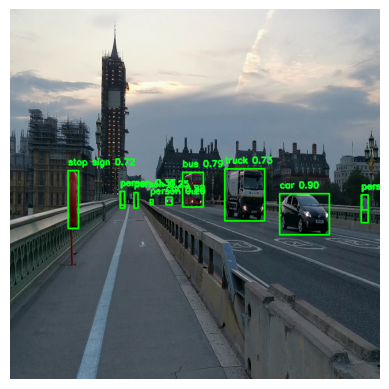

In [ ]:
import matplotlib.pyplot as plt

# Definisikan fungsi untuk mendeteksi manusia, mobil, truk, bis, sepeda, dan stop sign
def detect_objects(frame):
    results = model(frame)  # Lakukan deteksi objek menggunakan YOLOv5
    detected_objects = []  # Daftar untuk menyimpan deteksi yang relevan

    for result in results:
        for obj in result.boxes:
            label = model.names[int(obj.cls)]
            if label in ['person', 'car', 'truck', 'bus', 'bicycle', 'stop sign']:  # Filter hanya 'person', 'car', 'truck', 'bus', 'bicycle', 'stop sign'
                # Mendapatkan koordinat bounding box
                x1, y1, x2, y2 = obj.xyxy[0].tolist()
                confidence = obj.conf.item()
                detected_objects.append({'label': label, 'confidence': confidence, 'bbox': [x1, y1, x2, y2]})

    return detected_objects

# Buka file video dan loncat ke detik ke-15
cap = cv2.VideoCapture(data)

# Hitung nomor frame untuk detik ke-10
fps = cap.get(cv2.CAP_PROP_FPS)  # Frame per detik dari video
frame_target = int(fps * 15)  # Hitung nomor frame untuk detik ke-15

cap.set(cv2.CAP_PROP_POS_FRAMES, frame_target)  # Atur video untuk mulai pada detik ke-15

# Membaca frame pada detik ke-15
ret, frame = cap.read()

if ret:
    # Mengubah ukuran frame dengan ukuran target 640x640
    frame_resized = cv2.resize(frame, (640, 640))

    # Mendeteksi 'person', 'car', 'truck', 'bus', 'bicycle', 'stop sign' pada frame yang sudah diubah ukurannya
    detected_objects = detect_objects(frame_resized)

    # Menampilkan bounding boxes untuk deteksi objek
    for obj in detected_objects:
        x1, y1, x2, y2 = [int(coord) for coord in obj['bbox']]
        confidence = obj['confidence']
        label = obj['label']

        # Menampilkan bounding box dan label
        cv2.rectangle(frame_resized, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame_resized, f'{label} {confidence:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 2)

    # Konversi frame ke RGB (karena OpenCV menggunakan BGR) dan tampilkan gambar menggunakan matplotlib
    frame_rgb = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.show()

cap.release()